In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from patsy import dmatrices
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [4]:
data = pd.read_csv("./data/train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data = data.drop(["Ticket", "Cabin"], axis = 1)
data = data.dropna()   # default dropping rows with missing values 0

In [6]:
len(data)

712

In [10]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,29.125,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.000,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.000,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,7.750,Q


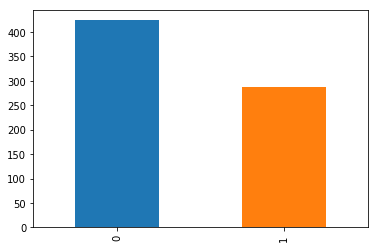

In [11]:
data.Survived.value_counts().plot(kind = "bar")

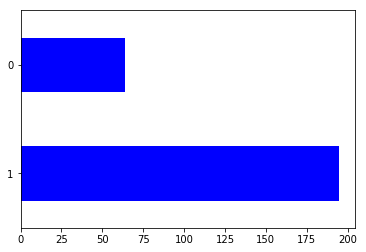

In [13]:
data.Survived[data.Sex == "female"].value_counts().plot(kind="barh", color = "blue", label = "Female")

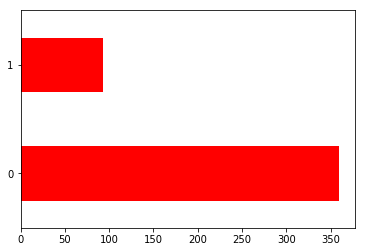

In [16]:
data.Survived[data.Sex == "male"].value_counts().plot(kind = "barh", 
                                                      color = "red", label = "male")

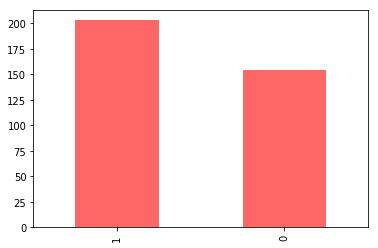

In [17]:
data.Survived[data.Pclass!=3].value_counts().plot(kind = "bar",
                                                 color = "red",
                                                 label = "Highclass",
                                                 alpha = 0.6)

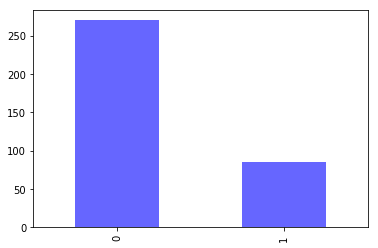

In [20]:
data.Survived[data.Pclass == 3].value_counts().plot(kind = "bar",
                                                 color = "blue", 
                                                 label = "Lowclass",
                                                 alpha = 0.6)

#start prepare data for model

In [23]:
y, X = dmatrices("Survived~C(Pclass)+C(Sex)+Age+C(Embarked)", 
                 data = data,
                return_type="dataframe")
y = np.ravel(y)

In [24]:
model = LogisticRegression()

In [25]:
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [26]:
model.score(X, y)

0.7935393258426966

In [28]:
1 - y.mean()  # the accurcy of null model

0.5955056179775281

In [29]:
pd.DataFrame(list(zip(X.columns, np.transpose(model.coef_))))

,0,1
0,Intercept,[1.714614448906586]
1,C(Pclass)[T.2],[-0.8796488848198318]
2,C(Pclass)[T.3],[-2.0750167275172595]
3,C(Sex)[T.male],[-2.324685405580778]
4,C(Embarked)[T.Q],[-0.5866266416981758]
5,C(Embarked)[T.S],[-0.4205053600284023]
6,Age,[-0.029619705366781664]


In [30]:
test_data = pd.read_csv("./data/test.csv")

In [32]:
test_data["Survived"] = 1
# get the index of data where is na
test_data.loc[np.isnan(test_data.Age), "Age"] = np.mean(data["Age"])

In [34]:
ytest, Xtest = dmatrices("Survived~C(Pclass)+C(Sex)+Age+C(Embarked)", 
                         data = test_data,
                        return_type="dataframe")

In [35]:
pred = model.predict(Xtest).astype(int)
solution = pd.DataFrame(list(zip(test_data["PassengerId"], pred)),
                        columns=["PassegerID", "Survived"])

In [37]:
solution.head()

,PassegerID,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [38]:
solution.to_csv("./my_prediction.csv", index = False)